In [1]:
import numpy as np
import torch
def MAPE(y_actual,y_predicted):
    if isinstance(y_actual, torch.Tensor):
        y_actual = y_actual.detach().cpu().numpy()
    if isinstance(y_predicted, torch.Tensor):
        y_predicted = y_predicted.detach().cpu().numpy()
    if isinstance(y_actual, list):
        y_actual = np.array(y_actual)
    if isinstance(y_predicted, list):
        y_predicted =  np.array(y_predicted)
    MAPE=np.mean(abs((y_actual-y_predicted)/y_actual))
    return MAPE


def RMSE(y_actual,y_predicted):
    if isinstance(y_actual, torch.Tensor):
        y_actual = y_actual.detach().cpu().numpy()
    if isinstance(y_predicted, torch.Tensor):
        y_predicted = y_predicted.detach().cpu().numpy()
    if isinstance(y_actual, list):
        y_actual = np.array(y_actual)
    if isinstance(y_predicted, list):
        y_predicted =  np.array(y_predicted)
    RMSE = np.sqrt(np.mean(np.square(y_actual-y_predicted)))
    return RMSE

def MAE(y_actual,y_predicted):
    if isinstance(y_actual, torch.Tensor):
        y_actual = y_actual.detach().cpu().numpy()
    if isinstance(y_predicted, torch.Tensor):
        y_predicted = y_predicted.detach().cpu().numpy()
    if isinstance(y_actual, list):
        y_actual = np.array(y_actual)
    if isinstance(y_predicted, list):
        y_predicted =  np.array(y_predicted)
    return np.mean(np.abs(y_actual-y_predicted))


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib.patches as mpatches
from matplotlib.ticker import FuncFormatter
import matplotlib as mpl
from matplotlib import font_manager as fm

font_path = './times.ttf' 
fm.fontManager.addfont(font_path)
prop = fm.FontProperties(fname=font_path)
font_name = prop.get_name()

mpl.rcParams['font.family'] = font_name

In [ ]:
import pandas as pd
import pickle
import numpy as np
import torch
path='./Result/NN+MILP/'
model_list=['Deepseek.pkl','Qwen.pkl','Llama.pkl']
with open(path+model_list[0],'rb') as f:
    result_ds=pickle.load(f)
with open(path+model_list[1],'rb') as f:
    result_qwen=pickle.load(f)
with open(path+model_list[2],'rb') as f:
    result_llama=pickle.load(f)


In [4]:
forecasts_org=[]
actuals=[]
for i in range(len(result_llama['original_load'])):
    forecasts_org+=(result_llama['original_load'][i].tolist())
    actuals+=(result_llama['actual_load'][i].tolist())
forecasts_ds=[]
for i in range(len(result_ds['fine_tuned_load'])):
    if isinstance(result_ds['fine_tuned_load'][i], np.ndarray):
        forecasts_ds += result_ds['fine_tuned_load'][i].tolist()
    else:
        forecasts_ds += result_ds['fine_tuned_load'][i]
forecasts_qwen=[]
for i in range(len(result_qwen['fine_tuned_load'])):
    if isinstance(result_qwen['fine_tuned_load'][i], np.ndarray):
        forecasts_qwen += result_qwen['fine_tuned_load'][i].tolist()
    else:
        forecasts_qwen += result_qwen['fine_tuned_load'][i]
forecasts_llama=[]
for i in range(len(result_llama['fine_tuned_load'])):
    if isinstance(result_llama['fine_tuned_load'][i], np.ndarray):
        forecasts_llama += result_llama['fine_tuned_load'][i].tolist()
    else:
        forecasts_llama += result_llama['fine_tuned_load'][i]
forecasts_opt=[]
for i in range(len(result_qwen['optnet_load'])):
    if isinstance(result_qwen['optnet_load'][i], np.ndarray):
        forecasts_opt += result_qwen['optnet_load'][i].tolist()
    else:
        forecasts_opt += result_qwen['optnet_load'][i]
print("Original RMSE:",RMSE(actuals,forecasts_org))
print("Deepseek Fine-tuned RMSE:",RMSE(actuals,forecasts_ds))
print("Qwen Fine-tuned RMSE:",RMSE(actuals,forecasts_qwen))
print("Llama Fine-tuned RMSE:",RMSE(actuals,forecasts_llama))

print("Original MAE:",MAE(actuals,forecasts_org))
print("Deepseek Fine-tuned MAE:",MAE(actuals,forecasts_ds))
print("Qwen Fine-tuned MAE:",MAE(actuals,forecasts_qwen))
print("Llama Fine-tuned MAE:",MAE(actuals,forecasts_llama))

Result_NN_MILP={}
Result_NN_MILP['MAE']=[MAE(actuals,forecasts_org),MAE(actuals,forecasts_qwen),MAE(actuals,forecasts_ds),MAE(actuals,forecasts_llama)]
Result_NN_MILP['RMSE']=[RMSE(actuals,forecasts_org),RMSE(actuals,forecasts_qwen),RMSE(actuals,forecasts_ds),RMSE(actuals,forecasts_llama)]
Result_NN_MILP['Pinball_Loss']=['']*4

Original RMSE: 0.04297159816439287
Deepseek Fine-tuned RMSE: 0.04067477421902914
Qwen Fine-tuned RMSE: 0.04075811703536009
Llama Fine-tuned RMSE: 0.04153831625251024
Original MAE: 0.033568660311520046
Deepseek Fine-tuned MAE: 0.031622171657088534
Qwen Fine-tuned MAE: 0.03181485383474145
Llama Fine-tuned MAE: 0.03257751062830608


In [ ]:
import pandas as pd
import pickle
import numpy as np
import torch
path='./Result/NN+LP/'
model_list=['Deepseek.pkl','Qwen.pkl','Llama.pkl']
with open(path+model_list[0],'rb') as f:
    result_ds=pickle.load(f)
with open(path+model_list[1],'rb') as f:
    result_qwen=pickle.load(f)
with open(path+model_list[2],'rb') as f:
    result_llama=pickle.load(f)


forecasts_org=[]
actuals=[]
for i in range(len(result_llama['original_load'])):
    if isinstance(result_llama['original_load'][i], np.ndarray):
        forecasts_org+=(result_llama['original_load'][i].tolist())
        actuals+=(result_llama['actual_load'][i].tolist())
    else:
        forecasts_org+=(result_llama['original_load'][i])
        actuals+=(result_llama['actual_load'][i])
forecasts_ds=[]
for i in range(len(result_ds['fine_tuned_load'])):
    if isinstance(result_ds['fine_tuned_load'][i], np.ndarray):
        forecasts_ds += result_ds['fine_tuned_load'][i].tolist()
    else:
        forecasts_ds += result_ds['fine_tuned_load'][i]
forecasts_qwen=[]
for i in range(len(result_qwen['fine_tuned_load'])):
    if isinstance(result_qwen['fine_tuned_load'][i], np.ndarray):
        forecasts_qwen += result_qwen['fine_tuned_load'][i].tolist()
    else:
        forecasts_qwen += result_qwen['fine_tuned_load'][i]
forecasts_llama=[]
for i in range(len(result_llama['fine_tuned_load'])):
    if isinstance(result_llama['fine_tuned_load'][i], np.ndarray):
        forecasts_llama += result_llama['fine_tuned_load'][i].tolist()
    else:
        forecasts_llama += result_llama['fine_tuned_load'][i]
forecasts_opt=[]
for i in range(len(result_llama['optnet_load'])):
    if isinstance(result_llama['optnet_load'][i], np.ndarray):
        forecasts_opt += result_llama['optnet_load'][i].tolist()
    else:
        forecasts_opt += result_llama['optnet_load'][i]
print("Original RMSE:",RMSE(actuals,forecasts_org))
print("Deepseek Fine-tuned RMSE:",RMSE(actuals,forecasts_ds))
print("Qwen Fine-tuned RMSE:",RMSE(actuals,forecasts_qwen))
print("Llama Fine-tuned RMSE:",RMSE(actuals,forecasts_llama))

print("Original MAE:",MAE(actuals,forecasts_org))
print("Deepseek Fine-tuned MAE:",MAE(actuals,forecasts_ds))
print("Qwen Fine-tuned MAE:",MAE(actuals,forecasts_qwen))
print("Llama Fine-tuned MAE:",MAE(actuals,forecasts_llama))

Result_NN_LP={}
Result_NN_LP['MAE']=[MAE(actuals,forecasts_org),MAE(actuals,forecasts_opt),MAE(actuals,forecasts_qwen),MAE(actuals,forecasts_ds),MAE(actuals,forecasts_llama)]
Result_NN_LP['RMSE']=[RMSE(actuals,forecasts_org),RMSE(actuals,forecasts_opt),RMSE(actuals,forecasts_qwen),RMSE(actuals,forecasts_ds),RMSE(actuals,forecasts_llama)]
Result_NN_LP['Pinball_Loss']=['']*5

print(np.mean(result_qwen['cost_org']))
print(np.mean(result_qwen['cost_optnet']))
print(np.mean(result_qwen['cost_after']))
print(np.mean(result_ds['cost_after']))
print(np.mean(result_llama['cost_after']))


Original RMSE: 0.042971595668386584
Deepseek Fine-tuned RMSE: 0.042054449874610295
Qwen Fine-tuned RMSE: 0.042979923287837396
Llama Fine-tuned RMSE: 0.04297171268250777
Original MAE: 0.033568659668852543
Deepseek Fine-tuned MAE: 0.03321001658961605
Qwen Fine-tuned MAE: 0.03338675118725875
Llama Fine-tuned MAE: 0.03347978827866843
2881.5398922151003
2853.997905125558
2845.4815670298553
2844.5865256371067
2844.608327871857


In [6]:
import numpy as np
#import erfinv?
from scipy.special import erfinv
def pinball_loss(actual,mu,var,quantiles=[0.05*i for i in range(1,20)]):
#def pinball_loss(actual,mu,var,quantiles=[0.05,0.95]):
    if isinstance(actual, torch.Tensor):
        actual = actual.detach().cpu().numpy()
    if isinstance(mu, torch.Tensor):
        mu = mu.detach().cpu().numpy()
    if isinstance(var, torch.Tensor):
        var = var.detach().cpu().numpy()
    total_loss=0
    for q in quantiles:
        q_mu=mu + np.sqrt(var)*np.sqrt(2)*erfinv(2*q-1)
        diff=actual - q_mu
        loss = np.maximum(q*diff, (q-1)*diff)
        total_loss += np.mean(loss)
    return total_loss/len(quantiles)

from scipy.special import erfinv
import numpy as np

def winkler_loss(actual, mu, var, tau=0.1):
    """
    计算 Winkler score（平均）。
    actual, mu, var 可以是 numpy 数组或 torch.Tensor（会被转换为 numpy）。
    tau: 显著性水平 alpha（0 < tau < 1），例如 0.1 表示 90% 置信区间。
    """
    # 延续此前风格：允许传入 torch.Tensor
    try:
        import torch
    except Exception:
        torch = None

    if torch is not None and isinstance(actual, torch.Tensor):
        actual = actual.detach().cpu().numpy()
    if torch is not None and isinstance(mu, torch.Tensor):
        mu = mu.detach().cpu().numpy()
    if torch is not None and isinstance(var, torch.Tensor):
        var = var.detach().cpu().numpy()

    actual = np.asarray(actual)
    mu = np.asarray(mu)
    var = np.asarray(var)

    if not (0.0 < tau < 1.0):
        raise ValueError("tau must be in (0, 1)")

    # 防止负方差导致 NaN
    std = np.sqrt(np.maximum(var, 0.0))

    # z 对应上/下界的标准正态分位数：z = Phi^{-1}(1 - tau/2)
    # 使用 erfinv: Phi^{-1}(p) = sqrt(2) * erfinv(2p - 1)
    z = np.sqrt(2.0) * erfinv(1.0 - tau)  # 因为 2*(1-tau/2)-1 = 1 - tau

    lower = mu - z * std
    upper = mu + z * std
    width = upper - lower  # = 2 * z * std

    # Winkler score: width + 2/alpha * (L - y) if y < L; width + 2/alpha * (y - U) if y > U; else width
    below = actual < lower
    above = actual > upper

    penalty_below = (lower - actual) * (2.0 / tau) * below
    penalty_above = (actual - upper) * (2.0 / tau) * above

    score = width + penalty_below + penalty_above

    # 对所有样本和元素求均值，返回标量
    return np.mean(score)

    

In [ ]:
import pandas as pd
import pickle
import numpy as np
import torch

min_value=1979
max_value=5224
path='./Result/NN+SO/'
model_list=['Deepseek.pkl','Qwen.pkl','Llama.pkl']
with open(path+model_list[0],'rb') as f:
    result_ds=pickle.load(f)
with open(path+model_list[1],'rb') as f:
    result_qwen=pickle.load(f)
with open(path+model_list[2],'rb') as f:
    result_llama=pickle.load(f)


forecasts_mu_org=[]
forecasts_org_var=[]
actuals=[]
for i in range(len(result_llama['original_mu'])):
    if isinstance(result_llama['original_mu'][i], np.ndarray):
        forecasts_mu_org+=(result_llama['original_mu'][i].tolist())
    else:
        forecasts_mu_org+=(result_llama['original_mu'][i])
    if isinstance(result_llama['original_var'][i], np.ndarray):
        forecasts_org_var+=(result_llama['original_var'][i].tolist())
    else:  
        forecasts_org_var+=(result_llama['original_var'][i])
    if isinstance(result_llama['actual_load'][i], np.ndarray):
        actuals+=(result_llama['actual_load'][i].tolist())
    else:
        actuals+=(result_llama['actual_load'][i])
forecasts_mu_org=(np.array(forecasts_mu_org)-min_value)/(max_value - min_value)
forecasts_org_var=(np.array(forecasts_org_var)/(max_value - min_value))
actuals=(np.array(actuals)-min_value)/(max_value - min_value)

forecasts_mu_ds=[]
forecasts_var_ds=[]
for i in range(len(result_ds['fine_tuned_mu'])):
    if isinstance(result_ds['fine_tuned_mu'][i], np.ndarray):
        forecasts_mu_ds += result_ds['fine_tuned_mu'][i].tolist()
    else:
        forecasts_mu_ds += result_ds['fine_tuned_mu'][i]
    if isinstance(result_ds['fine_tuned_var'][i], np.ndarray):
        forecasts_var_ds += result_ds['fine_tuned_var'][i].tolist()
    else:
        forecasts_var_ds += result_ds['fine_tuned_var'][i]
forecasts_mu_ds=(np.array(forecasts_mu_ds)-min_value)/(max_value - min_value)
forecasts_var_ds=(np.array(forecasts_var_ds)/(max_value - min_value))
        
forecasts_mu_qwen=[]
forecasts_var_qwen=[]
for i in range(len(result_qwen['fine_tuned_mu'])):
    if isinstance(result_qwen['fine_tuned_mu'][i], np.ndarray):
        forecasts_mu_qwen += result_qwen['fine_tuned_mu'][i].tolist()
    else:
        forecasts_mu_qwen += result_qwen['fine_tuned_mu'][i]
    if isinstance(result_qwen['fine_tuned_var'][i], np.ndarray):
        forecasts_var_qwen += result_qwen['fine_tuned_var'][i].tolist()
    else:
        forecasts_var_qwen += result_qwen['fine_tuned_var'][i]
forecasts_mu_qwen=(np.array(forecasts_mu_qwen)-min_value)/(max_value - min_value)
forecasts_var_qwen=(np.array(forecasts_var_qwen)/(max_value - min_value))

forecasts_mu_llama=[]
forecasts_var_llama=[]
for i in range(len(result_llama['fine_tuned_mu'])):
    if isinstance(result_llama['fine_tuned_mu'][i], np.ndarray):
        forecasts_mu_llama += result_llama['fine_tuned_mu'][i].tolist()
    else:
        forecasts_mu_llama += result_llama['fine_tuned_mu'][i]
    if isinstance(result_llama['fine_tuned_var'][i], np.ndarray):
        forecasts_var_llama += result_llama['fine_tuned_var'][i].tolist()
    else:
        forecasts_var_llama += result_llama['fine_tuned_var'][i]
forecasts_mu_llama=(np.array(forecasts_mu_llama)-min_value)/(max_value - min_value)
forecasts_var_llama=(np.array(forecasts_var_llama)/(max_value - min_value))

forecasts_mu_opt=[]
forecasts_var_opt=[]
for i in range(len(result_llama['optnet_mu'])):
    if isinstance(result_llama['optnet_mu'][i], np.ndarray):
        forecasts_mu_opt += result_llama['optnet_mu'][i].tolist()
    else:
        forecasts_mu_opt += result_llama['optnet_mu'][i]
    if isinstance(result_llama['optnet_var'][i], np.ndarray):
        forecasts_var_opt += result_llama['optnet_var'][i].tolist()
    else:
        forecasts_var_opt += result_llama['optnet_var'][i]
forecasts_mu_opt=(np.array(forecasts_mu_opt)-min_value)/(max_value - min_value)
forecasts_var_opt=(np.array(forecasts_var_opt)/(max_value - min_value))
        
print("Original RMSE:",RMSE(actuals,forecasts_mu_org))
print("Deepseek Fine-tuned RMSE:",RMSE(actuals,forecasts_mu_ds))
print("Qwen Fine-tuned RMSE:",RMSE(actuals,forecasts_mu_qwen))
print("Llama Fine-tuned RMSE:",RMSE(actuals,forecasts_mu_llama))

print("Original MAE:",MAE(actuals,forecasts_mu_org))
print("Deepseek Fine-tuned MAE:",MAE(actuals,forecasts_mu_ds))
print("Qwen Fine-tuned MAE:",MAE(actuals,forecasts_mu_qwen))
print("Llama Fine-tuned MAE:",MAE(actuals,forecasts_mu_llama))

print("Original Pinball Loss:",pinball_loss(actuals,forecasts_mu_org,forecasts_org_var))
print("Deepseek Fine-tuned Pinball Loss:",pinball_loss(actuals,forecasts_mu_ds,forecasts_var_ds))
print("Qwen Fine-tuned Pinball Loss:",pinball_loss(actuals,forecasts_mu_qwen,forecasts_var_qwen))
print("Llama Fine-tuned Pinball Loss:",pinball_loss(actuals,forecasts_mu_llama,forecasts_var_llama))


Result_NN_SO={}
Result_NN_SO['MAE']=[MAE(actuals,forecasts_mu_org),MAE(actuals,forecasts_mu_opt),MAE(actuals,forecasts_mu_qwen),MAE(actuals,forecasts_mu_ds),MAE(actuals,forecasts_mu_llama)]
Result_NN_SO['RMSE']=[RMSE(actuals,forecasts_mu_org),RMSE(actuals,forecasts_mu_opt),RMSE(actuals,forecasts_mu_qwen),RMSE(actuals,forecasts_mu_ds),RMSE(actuals,forecasts_mu_llama)]
Result_NN_SO['Pinball_Loss']=[pinball_loss(actuals,forecasts_mu_org,forecasts_org_var),pinball_loss(actuals,forecasts_mu_opt,forecasts_var_opt),pinball_loss(actuals,forecasts_mu_qwen,forecasts_var_qwen),pinball_loss(actuals,forecasts_mu_ds,forecasts_var_ds),pinball_loss(actuals,forecasts_mu_llama,forecasts_var_llama)]
Result_NN_SO['Winlker_Loss']=[winkler_loss(actuals,forecasts_mu_org,forecasts_org_var),winkler_loss(actuals,forecasts_mu_opt,forecasts_var_opt),winkler_loss(actuals,forecasts_mu_qwen,forecasts_var_qwen),winkler_loss(actuals,forecasts_mu_ds,forecasts_var_ds),winkler_loss(actuals,forecasts_mu_llama,forecasts_var_llama)]

print(np.mean(result_qwen['cost_org']))
print(np.mean(result_qwen['cost_optnet']))
print(np.mean(result_qwen['cost_after']))
print(np.mean(result_ds['cost_after']))
print(np.mean(result_llama['cost_after']))


Original RMSE: 0.05378296151493258
Deepseek Fine-tuned RMSE: 0.05436154406696212
Qwen Fine-tuned RMSE: 0.053843598986078725
Llama Fine-tuned RMSE: 0.05431984798696894
Original MAE: 0.04406473691436066
Deepseek Fine-tuned MAE: 0.044479901102468314
Qwen Fine-tuned MAE: 0.044156588925626766
Llama Fine-tuned MAE: 0.04434388975302379
Original Pinball Loss: 0.0290024935111718
Deepseek Fine-tuned Pinball Loss: 0.028884958260395124
Qwen Fine-tuned Pinball Loss: 0.028823921917380677
Llama Fine-tuned Pinball Loss: 0.028879424816745786
3002.078768588654
2960.2249544329475
2948.445309096984
2953.1927266139833
2951.873585671331


In [ ]:
import pandas as pd
import pickle
import numpy as np
import torch
path='./Result/Tree+LP/'
model_list=['Deepseek.pkl','Qwen.pkl','Llama.pkl']
with open(path+model_list[0],'rb') as f:
    result_ds=pickle.load(f)
with open(path+model_list[1],'rb') as f:
    result_qwen=pickle.load(f)
with open(path+model_list[2],'rb') as f:
    result_llama=pickle.load(f)


forecasts_org=[]
actuals=[]
for i in range(len(result_llama['original_load'])):
    if isinstance(result_llama['original_load'][i], np.ndarray):
        forecasts_org+=(result_llama['original_load'][i].tolist())
        actuals+=(result_llama['actual_load'][i].tolist())
    else:
        forecasts_org+=(result_llama['original_load'][i])
        actuals+=(result_llama['actual_load'][i])
forecasts_ds=[]
for i in range(len(result_ds['fine_tuned_load'])):
    if isinstance(result_ds['fine_tuned_load'][i], np.ndarray):
        forecasts_ds += result_ds['fine_tuned_load'][i].tolist()
    else:
        forecasts_ds += result_ds['fine_tuned_load'][i]
forecasts_qwen=[]
for i in range(len(result_qwen['fine_tuned_load'])):
    if isinstance(result_qwen['fine_tuned_load'][i], np.ndarray):
        forecasts_qwen += result_qwen['fine_tuned_load'][i].tolist()
    else:
        forecasts_qwen += result_qwen['fine_tuned_load'][i]
forecasts_llama=[]
for i in range(len(result_llama['fine_tuned_load'])):
    if isinstance(result_llama['fine_tuned_load'][i], np.ndarray):
        forecasts_llama += result_llama['fine_tuned_load'][i].tolist()
    else:
        forecasts_llama += result_llama['fine_tuned_load'][i]
forecasts_opt=[]
for i in range(len(result_llama['optnet_load'])):
    if isinstance(result_llama['optnet_load'][i], np.ndarray):
        forecasts_opt += result_llama['optnet_load'][i].tolist()
    else:
        forecasts_opt += result_llama['optnet_load'][i]
print("Original RMSE:",RMSE(actuals,forecasts_org))
print("Deepseek Fine-tuned RMSE:",RMSE(actuals,forecasts_ds))
print("Qwen Fine-tuned RMSE:",RMSE(actuals,forecasts_qwen))
print("Llama Fine-tuned RMSE:",RMSE(actuals,forecasts_llama))

print("Original MAE:",MAE(actuals,forecasts_org))
print("Deepseek Fine-tuned MAE:",MAE(actuals,forecasts_ds))
print("Qwen Fine-tuned MAE:",MAE(actuals,forecasts_qwen))
print("Llama Fine-tuned MAE:",MAE(actuals,forecasts_llama))

Result_Tree_LP={}
Result_Tree_LP['MAE']=[MAE(actuals,forecasts_org),MAE(actuals,forecasts_qwen),MAE(actuals,forecasts_ds),MAE(actuals,forecasts_llama)]
Result_Tree_LP['RMSE']=[RMSE(actuals,forecasts_org),RMSE(actuals,forecasts_qwen),RMSE(actuals,forecasts_ds),RMSE(actuals,forecasts_llama)]
Result_Tree_LP['Pinball_Loss']=['']*4

Original RMSE: 0.05599090291851924
Deepseek Fine-tuned RMSE: 0.05350532045486356
Qwen Fine-tuned RMSE: 0.05259425557962004
Llama Fine-tuned RMSE: 0.0546602212118595
Original MAE: 0.0439114946089898
Deepseek Fine-tuned MAE: 0.04174331355227677
Qwen Fine-tuned MAE: 0.040961286364681694
Llama Fine-tuned MAE: 0.0423634221469469


font internal name: Times New Roman


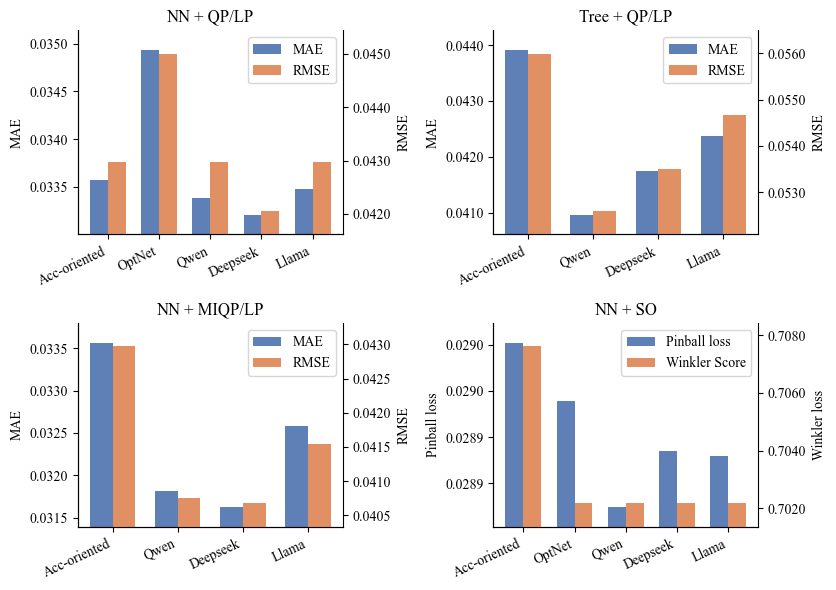

In [9]:
import os, matplotlib as mpl
from matplotlib import font_manager as fm

font_path = './times.ttf' # 确认路径
assert os.path.exists(font_path), f"font file not found: {font_path}"

fm.fontManager.addfont(font_path)
prop = fm.FontProperties(fname=font_path)
font_name = prop.get_name()
print("font internal name:", font_name)
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['font.serif'] = [font_name] + mpl.rcParams.get('font.serif', [])


# mpl.rcParams['font.family'] = font_name
#sns.set_style('white')  # 无网格风格

# 数据字典（在你的环境中应已存在这些变量）
datasets = {
    'NN+LP': Result_NN_LP,
    'Tree+LP': Result_Tree_LP,
    'NN+MILP': Result_NN_MILP,
    'NN+SO': Result_NN_SO
}

labels_5 = [
    "Acc-oriented",
    "OptNet",
    "Qwen",
    "Deepseek",
    "Llama"
]
labels_4 = [
    "Acc-oriented",
    "Qwen",
    "Deepseek",
    "Llama"
]

colors = ['#4C72B0', '#DD8452']  # MAE, RMSE

def adaptive_ylim(arr, pad_ratio=0.12, force_nonnegative=True):
    mn = np.min(arr)
    mx = np.max(arr)
    rng = mx - mn
    if rng == 0:
        pad = max(0.1 * abs(mx), 0.1)
    else:
        pad = rng * pad_ratio
    ymin = mn - pad
    ymax = mx + pad
    if force_nonnegative:
        ymin = max(0.0, ymin)
    return ymin, ymax

def autolabel_axis(bars, axis, fmt='{:.4f}', offset_ratio=0.03, rotation=25):
    ymin, ymax = axis.get_ylim()
    offset = (ymax - ymin) * offset_ratio
    for bar in bars:
        h = bar.get_height()
        x = bar.get_x() - bar.get_width() / 2
        axis.text(x, h + offset, fmt.format(h),
                  ha='center', va='bottom',
                  fontsize=8, color='black',
                  rotation=rotation, rotation_mode='anchor',
                  clip_on=False)

# 格式化器：固定四位小数
four_dec_fmt = FuncFormatter(lambda x, pos: f"{x:.4f}")

# 创建 2x2 子图
fig, axs = plt.subplots(2, 2, figsize=(9, 6))
axs_flat = axs.flatten()

for ax, (name, result) in zip(axs_flat, datasets.items()):
    mae = np.array(result['MAE'])
    rmse = np.array(result['RMSE'])
    if name == 'NN+SO':
        pinball = np.array(result['Pinball_Loss'])
        WS = np.array(result['Winlker_Loss'])

    # 选择 labels（按要求）
    if name in ('Tree+LP', 'NN+MILP'):
        labels = labels_4
    else:
        labels = labels_5

    assert len(mae) == len(labels) == len(rmse), f"数据长度与 labels 不匹配: {name}"

    x = np.arange(len(labels))
    width = 0.35

    ax2 = ax.twinx()

    if name == 'NN+SO':
        bars1 = ax.bar(x - width/2, pinball, width, label='Pinball', color=colors[0], alpha=0.9)
        bars2 = ax2.bar(x + width/2, WS, width, label='Winkler', color=colors[1], alpha=0.9)
        ymin1, ymax1 = adaptive_ylim(pinball, pad_ratio=0.12, force_nonnegative=True)
        ymin2, ymax2 = adaptive_ylim(WS, pad_ratio=0.15, force_nonnegative=True)
    else:
        bars1 = ax.bar(x - width/2, mae, width, label='MAE', color=colors[0], alpha=0.9)
        bars2 = ax2.bar(x + width/2, rmse, width, label='RMSE', color=colors[1], alpha=0.9)
        ymin1, ymax1 = adaptive_ylim(mae, pad_ratio=0.12, force_nonnegative=True)
        ymin2, ymax2 = adaptive_ylim(rmse, pad_ratio=0.15, force_nonnegative=True)

    ax.set_xticks(x)
    ax.set_xticklabels(labels, rotation=25, ha='right', fontsize=10)

    ax.set_ylim(ymin1, ymax1)
    ax2.set_ylim(ymin2, ymax2)

    # 将 y 轴刻度格式化为四位小数
    ax.yaxis.set_major_formatter(four_dec_fmt)
    ax2.yaxis.set_major_formatter(four_dec_fmt)

    if name == 'NN+SO':
        ax.set_ylabel('Pinball loss')
        ax2.set_ylabel('Winkler loss')
    else:
        ax.set_ylabel('MAE')
        ax2.set_ylabel('RMSE')
    if name == 'NN+LP':
        ax.set_title('NN + QP/LP', fontsize=12)
    elif name=='Tree+LP':
        ax.set_title('Tree + QP/LP', fontsize=12)
    elif name=='NN+MILP':
        ax.set_title('NN + MIQP/LP', fontsize=12)
    elif name=='NN+SO':
        ax.set_title('NN + SO', fontsize=12)

    # 关闭次刻度与网格，防止横线
    ax.minorticks_off()
    ax2.minorticks_off()
    ax.grid(False)
    ax2.grid(False)

    # 隐藏上边框，保持整洁
    ax.spines['top'].set_visible(False)
    ax2.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    #如果需要在每个子图内部显示图例，请先准备 handles/labels，否则移除该行
    handles1, labels1 = ax.get_legend_handles_labels()
    handles2, labels2 = ax2.get_legend_handles_labels()
    handles = handles1 + handles2
    labels_legend = labels1 + labels2
    if name=='NN+SO':
        labels_legend=['Pinball loss',f'Winkler Score']
    ax.legend(handles, labels_legend)

    # 在柱顶显示数值（按需开启）
    # autolabel_axis(bars1, ax, '{:.4f}', offset_ratio=0.02, rotation=25)
    # autolabel_axis(bars2, ax2, '{:.4f}', offset_ratio=0.02, rotation=25)

plt.tight_layout(rect=[0, 0, 0.94, 1])  # 留出右侧空间给图例
plt.savefig('Accuracy EN.pdf',dpi=1000)
plt.show()
